<h1><b><u> Data 601 Final Project:

### Project Proposal
Description
This dataset includes the drug induced death from different states of USA and people with STD cases in the states of USA,I choose this dataset because I need to analyse the condition that people with STD diseases indulge themselves in drugs which can lead them to death.

#### Hypothesis:

People of california have the highest death count due to drugs use with std cases

#### Question: 

1.) Do people with Gonorrhea cases have the highest number of cases and have the highest mortality rate due to drug 
overdose in 2010?

2.) Did the deaths increase statewise as the years passed by?

#### Dataset Links:
1.)
Data1 link:https://wonder.cdc.gov/controller/datarequest/D140;jsessionid=957FAE5B06A03181B9A9E22DB11B2C97
The data was discovered from data.world with search term drug deaths

Data Types: int,string

Exploratory Data Analysis: EDA is not documented for this dataset

Cost:Free

Legality : Open source file available to download

Number of Rows:2018

Number of columns:10

Size of Dataset:126KB
<br>


2.)
Data2 link:https://data.world/makeovermonday/2019w31/workspace/file?filename=STD+Cases.csv
The data was discovered from data.world with search term std cases 

Data Types: int,float,string

Exploratory Data Analysis: EDA is not documented for this dataset

Cost:Free

Legality : Open source file available to download

Number of Rows:42530

Number of columns:10

Size of Dataset:2.86 MB


### Primary Observation:
The primary observation about both the data sets is that the STD dataset is about the std cases of the people from states of USA from year 1996 to 2014 and the drugs dataset about the people death count who were indulged in drugs from states of USA from year 1999 to 2016. By using the two dataset we could analyse the std cases and the drugs death based on the staes and the year from 1999 to 2014.

#### Hypothesis:

People of california have the highest death count due to drugs use with std cases- Yes


#### Question:

Did the deaths increase statewise as the years passed by?

Answer :-
Yes, as we can observe that the population in the states over the years did not change significantly but the number of deaths in the states grew irrespective of the population.

Do people with Gonorrhea cases have the highest number of cases and have the highest mortality rate due to drug 
overdose in 2010?

Answer :-
No people with Gonorrhea cases do not have the highest number of cases and mortality rate due to drug overdose in 2010 but they have the highest STD cases and drugs death in 2014.


In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.io as pio
import missingno as no

## Loading 1st Dataset:


In [2]:
df = pd.read_csv('https://query.data.world/s/mwlel3app5cnpa3icirzmosxqzc2lb')
dataframe1 = df.rename(columns={'Disease Code': 'Disease_Code', 'STD Cases': 'STD_Cases'})

In [3]:
dataframe1

,Disease,Disease_Code,State,Year,Gender,Age,Age Code,STD_Cases,Population,Rate per 100K
0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29
...,...,...,...,...,...,...,...,...,...,...
42675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Overview Of 1st Dataset:

In [4]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42680 entries, 0 to 42679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Disease        42530 non-null  object 
 1   Disease_Code   42530 non-null  float64
 2   State          42530 non-null  object 
 3   Year           42530 non-null  float64
 4   Gender         42530 non-null  object 
 5   Age            42530 non-null  object 
 6   Age Code       42530 non-null  object 
 7   STD_Cases      42530 non-null  float64
 8   Population     35483 non-null  float64
 9   Rate per 100K  35483 non-null  float64
dtypes: float64(5), object(5)
memory usage: 3.3+ MB


In [5]:
dataframe1.describe()

,Disease_Code,Year,STD_Cases,Population,Rate per 100K
count,42530.000000,42530.000000,42530.000000,3.548300e+04,35483.000000
mean,283.795533,2005.240607,603.133647,4.389794e+05,325.661860
std,13.723063,5.431696,1973.091099,7.605588e+05,697.545461
min,274.000000,1996.000000,1.000000,1.293700e+04,0.020000
25%,274.000000,2001.000000,8.000000,9.418100e+04,6.950000
50%,280.000000,2005.000000,59.000000,1.966280e+05,52.890000
75%,280.000000,2010.000000,380.000000,4.322250e+05,302.955000
max,310.000000,2014.000000,46885.000000,8.880836e+06,9078.950000


## Sanity Check and Cleansing Of the Dataset:

In [6]:
#dropping rows with all nan values
df1=dataframe1.dropna()

No Null Values in the Data Set


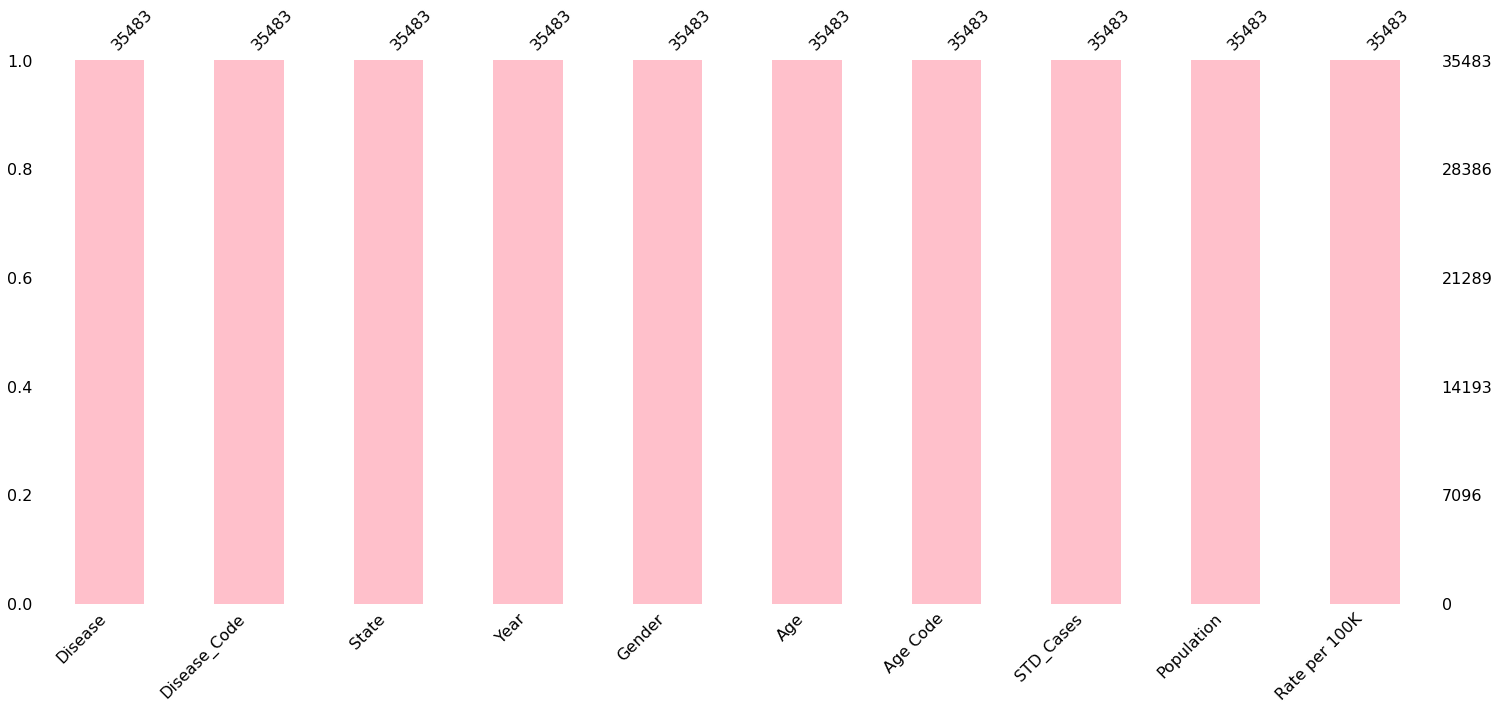

In [7]:
#Checking Null Values
if df1.isnull().any(axis=None):
    print("\nData with null values:\nxxxxxxxxxxxxx")
    print(df1[df1.isnull().any(axis=1)].head())
    no.matrix(df1)
    plt.show()
else:
    print('No Null Values in the Data Set')
    no.bar(df1, color='pink')

In [8]:
# generate count statistics of duplicate entries
if len(df1[df1.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df1[df1.duplicated()]))
    print(df1[df1.duplicated(keep=False)].sort_values(by=list(df1.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [9]:
df1.shape

(35483, 10)

<b>Since the data is divided into age groups we are interested in complete sum of the age group hence performing the below step

In [10]:
#Final dataframe 1
data1=df1.groupby(['Year','Disease','State','Disease_Code','Gender'],as_index=False).sum()

In [11]:
data1

,Year,Disease,State,Disease_Code,Gender,STD_Cases,Population,Rate per 100K
0,1996.0,Chlamydia,Alabama,274.0,Female,7323.0,2247223.0,4445.73
1,1996.0,Chlamydia,Alabama,274.0,Male,599.0,2083879.0,346.48
2,1996.0,Chlamydia,Alaska,274.0,Female,994.0,291955.0,4646.18
3,1996.0,Chlamydia,Alaska,274.0,Male,257.0,316614.0,1070.21
4,1996.0,Chlamydia,Arizona,274.0,Female,8631.0,2306882.0,5329.44
...,...,...,...,...,...,...,...,...
5608,2014.0,Primary and Secondary Syphilis,West Virginia,310.0,Female,6.0,784281.0,9.18
5609,2014.0,Primary and Secondary Syphilis,West Virginia,310.0,Male,22.0,754023.0,30.27
5610,2014.0,Primary and Secondary Syphilis,Wisconsin,310.0,Female,7.0,538068.0,3.93
5611,2014.0,Primary and Secondary Syphilis,Wisconsin,310.0,Male,79.0,2298459.0,35.61


In [12]:
data1.isnull().sum()

Year             0
Disease          0
State            0
Disease_Code     0
Gender           0
STD_Cases        0
Population       0
Rate per 100K    0
dtype: int64

In [13]:
#Analysing the unique enteries in the dataset.
def uniq_per_col(data1):
    for this_column in data1.columns:
        print("==== ",this_column,"has",data1[this_column].nunique(),"unique entries ====")
        print(data1[this_column].value_counts(),data1[this_column].count())
uniq_per_col(data1)

====  Year has 19 unique entries ====
2014.0    303
2013.0    302
2012.0    300
2007.0    299
2006.0    298
2010.0    298
2004.0    297
2008.0    297
2005.0    296
2003.0    294
2011.0    294
1999.0    293
1998.0    293
2009.0    293
2002.0    292
2001.0    292
2000.0    292
1996.0    291
1997.0    289
Name: Year, dtype: int64 5613
====  Disease has 3 unique entries ====
Gonorrhea                         1938
Chlamydia                         1934
Primary and Secondary Syphilis    1741
Name: Disease, dtype: int64 5613
====  State has 51 unique entries ====
Colorado                114
Arizona                 114
Pennsylvania            114
Kentucky                114
Massachusetts           114
Louisiana               114
Michigan                114
Washington              114
Wisconsin               114
Arkansas                114
Missouri                114
Illinois                114
Nevada                  114
Maryland                114
South Carolina          114
Tennessee        

According to the assessment, the data is consistent, so the dataset is clean, and all of the columns contain independent features, so the dataset is also clean.
The dataset's characters and digits are all correct.
The column names are easy to comprehend.
Because no cleaning is required, the data will have the same features.

# Analysing the First Dataset:

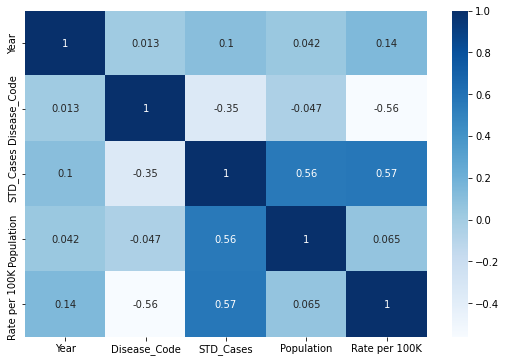

In [14]:
# Corelation of the Data
plt.figure(figsize=(9,6))
sns.heatmap(data1.corr(), yticklabels='auto',annot=True, cmap='Blues')
plt.show()

Based on the above table, We can clearly say that the data is mildly corelated in the first Dataset.

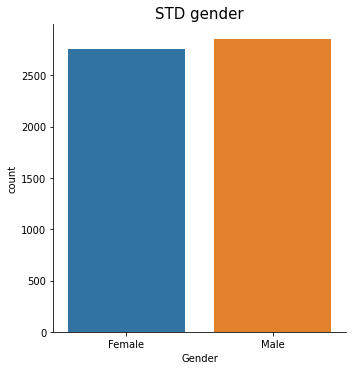

In [15]:
fig = sns.catplot(x='Gender', kind="count", data=data1)
plt.title('STD gender', fontsize = 15)
plt.show()

Based on the above observations, there is no significant difference between the std's recorded between men and women.

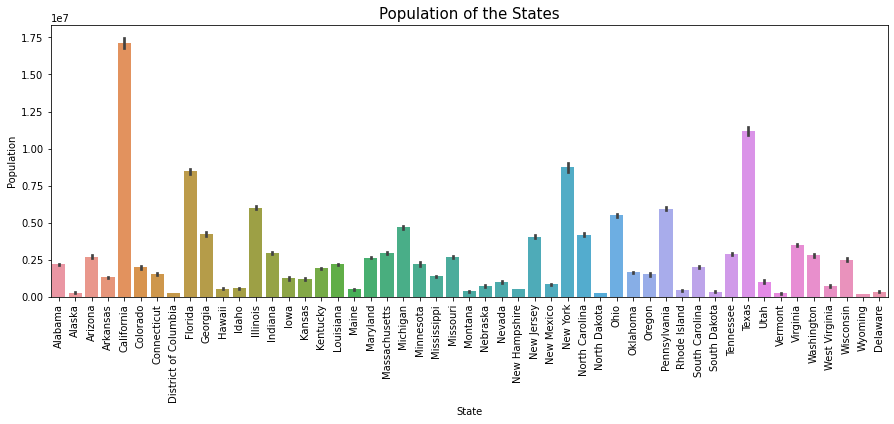

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='State',y='Population', data=data1)
plt.xticks(rotation=90)
plt.title('Population of the States', fontsize = 15)
plt.show()

Based on the above graph, we can see that the population of state california is recorded to be the highest.

In [46]:
figs=px.scatter(
    data1,
    x="Population",
    y="STD_Cases",
    title="Population and STD cases with Respect to Years",
    color='State',
    hover_name="State",
    size="STD_Cases",
    height=700,
    animation_frame='Year',
    animation_group="State",
)
figs.show()

Based on the above animation, we can clearly see that all states had a proportional growth in the STD cases and population in the displayed years where as Newyork had a sudden surge of population in the years 2000-2002 which eventually also lead to higher number of STD cases in it.

## Loading 2nd Dataset:

In [19]:
dataframe2= pd.read_csv(r"https://raw.githubusercontent.com/karan7697/data601/main/FINAL/Mortality%20Data.csv?token=AR3PFVSDRDZLWW25LYPA62TBWEVCI")
dataframe2

,State,State Code,Year,Year Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,% of Total Deaths
0,Alabama,1,1999,1999,35,4430141,0.8,0.6,1.1,0.1,0.00%
1,Alabama,1,2000,2000,46,4447100,1,0.8,1.4,0.2,0.10%
2,Alabama,1,2001,2001,42,4467634,0.9,0.7,1.3,0.1,0.00%
3,Alabama,1,2002,2002,49,4480089,1.1,0.8,1.4,0.2,0.10%
4,Alabama,1,2003,2003,62,4503491,1.4,1.1,1.8,0.2,0.10%
...,...,...,...,...,...,...,...,...,...,...,...
913,Wyoming,56,2012,2012,15,576765,2.6 (Unreliable),1.5,4.3,0.7,0.00%
914,Wyoming,56,2013,2013,Suppressed,582684,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed
915,Wyoming,56,2014,2014,Suppressed,583642,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed
916,Wyoming,56,2015,2015,14,586555,2.4 (Unreliable),1.3,4,0.6,0.00%


## Overview of the 2nd Dataset:

In [20]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   State                                     918 non-null    object
 1   State Code                                918 non-null    int64 
 2   Year                                      918 non-null    int64 
 3   Year Code                                 918 non-null    int64 
 4   Deaths                                    918 non-null    object
 5   Population                                918 non-null    int64 
 6   Crude Rate                                918 non-null    object
 7   Crude Rate Lower 95% Confidence Interval  918 non-null    object
 8   Crude Rate Upper 95% Confidence Interval  918 non-null    object
 9   Crude Rate Standard Error                 918 non-null    object
 10  % of Total Deaths                         918 non-

In [21]:
dataframe2.describe()

,State Code,Year,Year Code,Population
count,918.000000,918.000000,918.000000,9.180000e+02
mean,28.960784,2007.500000,2007.500000,5.920656e+06
std,15.685381,5.190956,5.190956,6.629855e+06
min,1.000000,1999.000000,1999.000000,4.917800e+05
25%,16.000000,2003.000000,2003.000000,1.599936e+06
50%,29.000000,2007.500000,2007.500000,4.131636e+06
75%,42.000000,2012.000000,2012.000000,6.696946e+06
max,56.000000,2016.000000,2016.000000,3.925002e+07


## Sanity Check Of 2nd Dataframe:

In [22]:
data2=dataframe2.dropna()

No Null Values in the Data Set


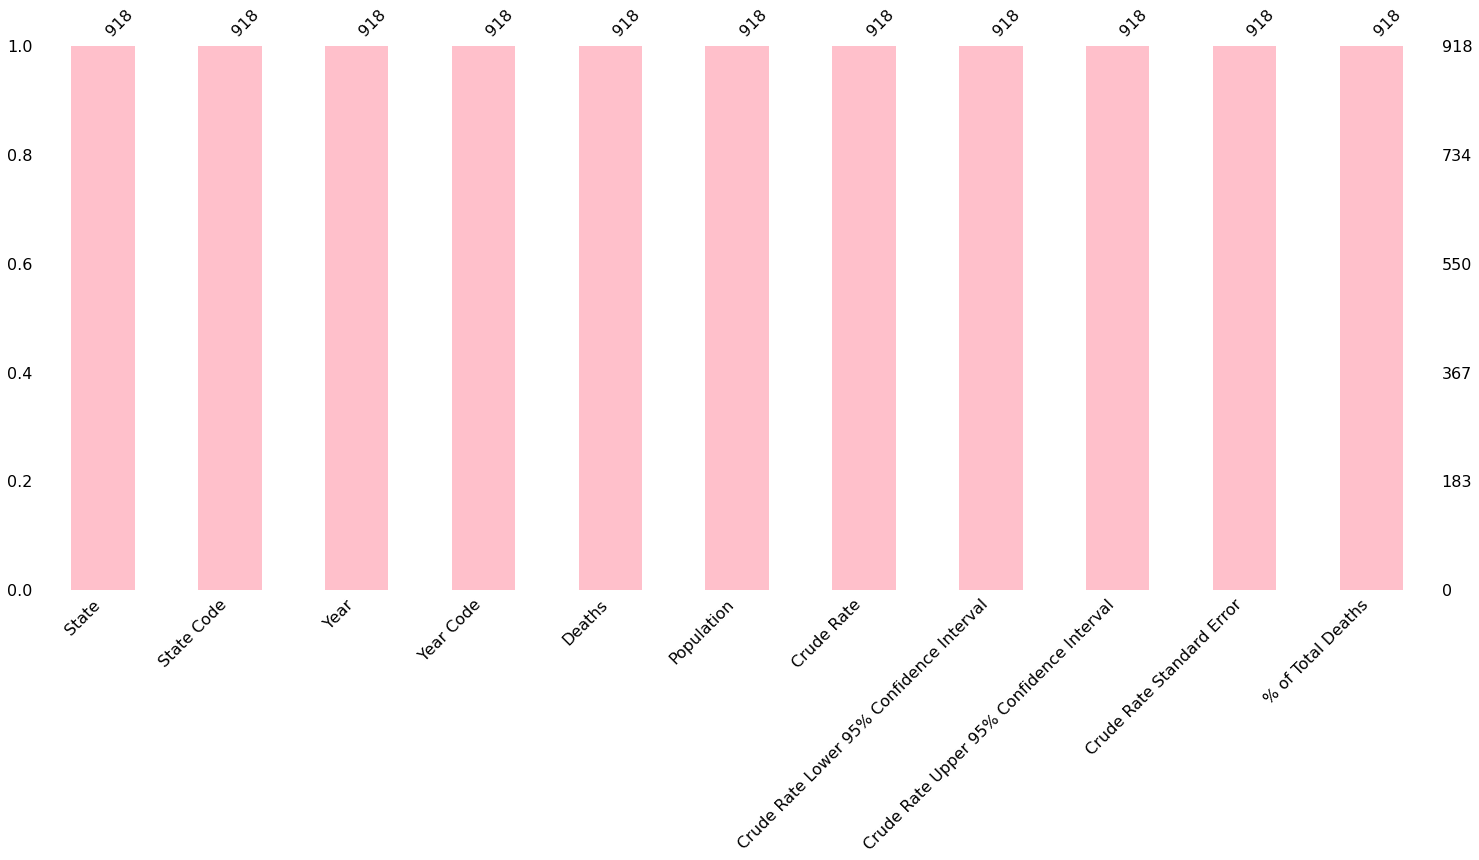

In [23]:
#Checking Null Values
if data2.isnull().any(axis=None):
    print("\nData with null values:\nxxxxxxxxxxxxx")
    print(data2[data2.isnull().any(axis=1)].head())
    no.matrix(data2)
    plt.show()
else:
    print('No Null Values in the Data Set')
    no.bar(data2, color='pink')

In [24]:
# generate count statistics of duplicate entries
if len(data2[data2.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(data2[data2.duplicated()]))
    print(data2[data2.duplicated(keep=False)].sort_values(by=list(data2.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [25]:
data2

,State,State Code,Year,Year Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,% of Total Deaths
0,Alabama,1,1999,1999,35,4430141,0.8,0.6,1.1,0.1,0.00%
1,Alabama,1,2000,2000,46,4447100,1,0.8,1.4,0.2,0.10%
2,Alabama,1,2001,2001,42,4467634,0.9,0.7,1.3,0.1,0.00%
3,Alabama,1,2002,2002,49,4480089,1.1,0.8,1.4,0.2,0.10%
4,Alabama,1,2003,2003,62,4503491,1.4,1.1,1.8,0.2,0.10%
...,...,...,...,...,...,...,...,...,...,...,...
913,Wyoming,56,2012,2012,15,576765,2.6 (Unreliable),1.5,4.3,0.7,0.00%
914,Wyoming,56,2013,2013,Suppressed,582684,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed
915,Wyoming,56,2014,2014,Suppressed,583642,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed
916,Wyoming,56,2015,2015,14,586555,2.4 (Unreliable),1.3,4,0.6,0.00%


In [26]:
df2 = data2[data2.Deaths != 'Suppressed']

In [27]:
#changing datatypes from obj to int
df2["Deaths"] = df2["Deaths"].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df2.dtypes

State                                       object
State Code                                   int64
Year                                         int64
Year Code                                    int64
Deaths                                       int64
Population                                   int64
Crude Rate                                  object
Crude Rate Lower 95% Confidence Interval    object
Crude Rate Upper 95% Confidence Interval    object
Crude Rate Standard Error                   object
% of Total Deaths                           object
dtype: object

In [29]:
#checking for unique entries also verifying the characters and digits are correct or not
def uniq_per_col(df2):
    for this_column in df2.columns:
        print("==== ",this_column,"has",df2[this_column].nunique(),"unique entries ====")
        print(df2[this_column].value_counts(),df2[this_column].count())
uniq_per_col(df2)

====  State has 51 unique entries ====
Kentucky                18
West Virginia           18
California              18
Delaware                18
Minnesota               18
Maine                   18
Connecticut             18
Arkansas                18
Iowa                    18
Utah                    18
South Carolina          18
New Jersey              18
Nevada                  18
Georgia                 18
Indiana                 18
Maryland                18
Florida                 18
Kansas                  18
Tennessee               18
Wisconsin               18
Texas                   18
Alabama                 18
New York                18
New Mexico              18
Virginia                18
Ohio                    18
Missouri                18
Colorado                18
Louisiana               18
Arizona                 18
Michigan                18
Illinois                18
Oregon                  18
North Carolina          18
Pennsylvania            18
Oklahoma        

As per the analysis there were few inconsistencies:<br>
1)The datatype of the deaths columns did not align suit the requirement. <br>
2)Dropped the rows which consisted of string in the numeric column to make the data consisitent. <br>
However, the is cleaned now and all the columns have independent features hence the dataset is tidy too. All the characters and digits in the dataset are correct.

## Analysing the 2nd Dataset:

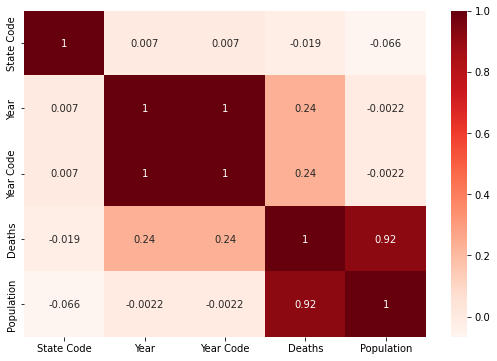

In [30]:
# Corelation of the Data
plt.figure(figsize=(9,6))
sns.heatmap(df2.corr(), yticklabels='auto',annot=True, cmap='Reds')
plt.show()

As per the above observation, the 2nd dataset is slight more corelated than the first dataset. We can note that death and population columns are higly corelated with each other.

### Did the deaths increase statewise as the years passed by?

In [31]:
fig=px.scatter(
    df2,
    x="Population",
    y="Deaths",
    title="Population and Deaths With Respect to Years",
    color='State',
    hover_name="State",
    size="Deaths",
    height=800,
    animation_frame='Year',
    animation_group="State",
)
fig.show()

ANSWER: Yes, as we can observe that the population in the states over the years did not change significantly but the number of deaths in the states grew irrespective of the population.

## Merging the Datasets:

In [32]:
dm=pd.merge(data1, df2, on=['Year','State'])


In [33]:
# Dropping the unnecessary columns from the merged dataset
dm.drop(['Crude Rate Lower 95% Confidence Interval', 'Crude Rate Upper 95% Confidence Interval','% of Total Deaths'], axis = 1 , inplace= True)

In [34]:
dm

,Year,Disease,State,Disease_Code,Gender,STD_Cases,Population_x,Rate per 100K,State Code,Year Code,Deaths,Population_y,Crude Rate,Crude Rate Standard Error
0,1999.0,Chlamydia,Alabama,274.0,Female,11430.0,2293259.0,7016.27,1,1999,35,4430141,0.8,0.1
1,1999.0,Chlamydia,Alabama,274.0,Male,770.0,2136882.0,446.67,1,1999,35,4430141,0.8,0.1
2,1999.0,Gonorrhea,Alabama,280.0,Female,5427.0,2293259.0,3284.85,1,1999,35,4430141,0.8,0.1
3,1999.0,Gonorrhea,Alabama,280.0,Male,5355.0,2136882.0,3104.36,1,1999,35,4430141,0.8,0.1
4,1999.0,Primary and Secondary Syphilis,Alabama,310.0,Female,102.0,2293259.0,55.01,1,1999,35,4430141,0.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,2014.0,Chlamydia,Wisconsin,274.0,Male,7077.0,2852160.0,3473.19,55,2014,156,5758377,2.7,0.2
4462,2014.0,Gonorrhea,Wisconsin,280.0,Female,2046.0,2890553.0,1056.63,55,2014,156,5758377,2.7,0.2
4463,2014.0,Gonorrhea,Wisconsin,280.0,Male,2027.0,2852160.0,961.98,55,2014,156,5758377,2.7,0.2
4464,2014.0,Primary and Secondary Syphilis,Wisconsin,310.0,Female,7.0,538068.0,3.93,55,2014,156,5758377,2.7,0.2


In [35]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4466 entries, 0 to 4465
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       4466 non-null   float64
 1   Disease                    4466 non-null   object 
 2   State                      4466 non-null   object 
 3   Disease_Code               4466 non-null   float64
 4   Gender                     4466 non-null   object 
 5   STD_Cases                  4466 non-null   float64
 6   Population_x               4466 non-null   float64
 7   Rate per 100K              4466 non-null   float64
 8   State Code                 4466 non-null   int64  
 9   Year Code                  4466 non-null   int64  
 10  Deaths                     4466 non-null   int64  
 11  Population_y               4466 non-null   int64  
 12  Crude Rate                 4466 non-null   object 
 13  Crude Rate Standard Error  4466 non-null   objec

In [36]:
dm.isnull().sum()

Year                         0
Disease                      0
State                        0
Disease_Code                 0
Gender                       0
STD_Cases                    0
Population_x                 0
Rate per 100K                0
State Code                   0
Year Code                    0
Deaths                       0
Population_y                 0
Crude Rate                   0
Crude Rate Standard Error    0
dtype: int64

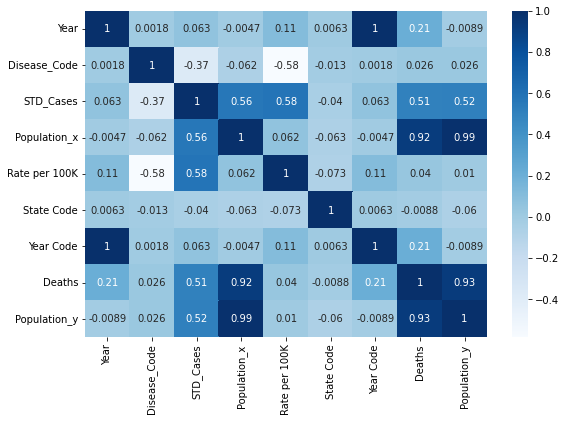

In [37]:
# Corelation of the Data
plt.figure(figsize=(9,6))
sns.heatmap(dm.corr(), yticklabels='auto',annot=True, cmap='Blues')
plt.show()

According to the analysis, this final data has no inconsistencies, so the dataset is clean, and all of the columns have independent features, so the dataset is neat as well. The dataset's characters and digits are all correct.

The column names are easy to comprehend.

Because no cleaning is required, the data will have the same features.

## Hypothesis : People of california have the highest death count due to drugs use with std cases

In [38]:
count1=dm.groupby(['Year','State','Gender']).sum().Deaths
count2=dm.groupby(['Year','State','Gender']).count().Deaths

count=count1/count2

hypo1=count.sort_values(ascending = False) 
hypo1=hypo1.to_frame()

In [39]:
hypo1=hypo1.groupby(['State']).sum().reset_index()
hypo1

,State,Deaths
0,Alabama,2090.0
1,Alaska,208.0
2,Arizona,3046.0
3,Arkansas,1670.0
4,California,14682.0
5,Colorado,1936.0
6,Connecticut,1398.0
7,Delaware,646.0
8,District of Columbia,408.0
9,Florida,10252.0


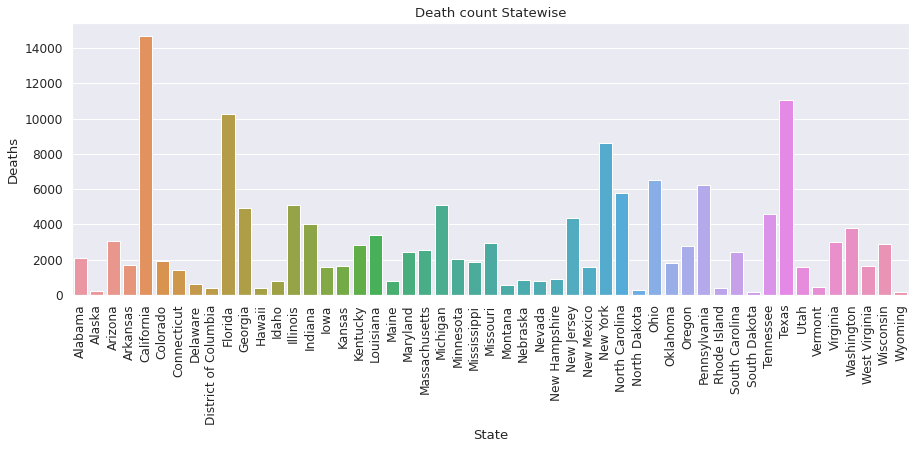

In [40]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.1)
sns.barplot(x='State',y='Deaths',data=hypo1).set_title("Death count Statewise")
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks(rotation=90)
plt.show()

As observed in the above plot, we can validate that the hypothesis where people of california have the highest death count due to std cases.

### Question : Do people with Gonorrhea cases have the highest number of cases and have the highest mortality rate due to drug overdose in 2010?

In [41]:
#making dataframe for only Chlamydia cases
data4=dm.loc[dm['Disease'] == 'Gonorrhea']

In [42]:
count2=data4.groupby(['Year','Disease']).sum().Deaths

Text(0, 0.5, '')

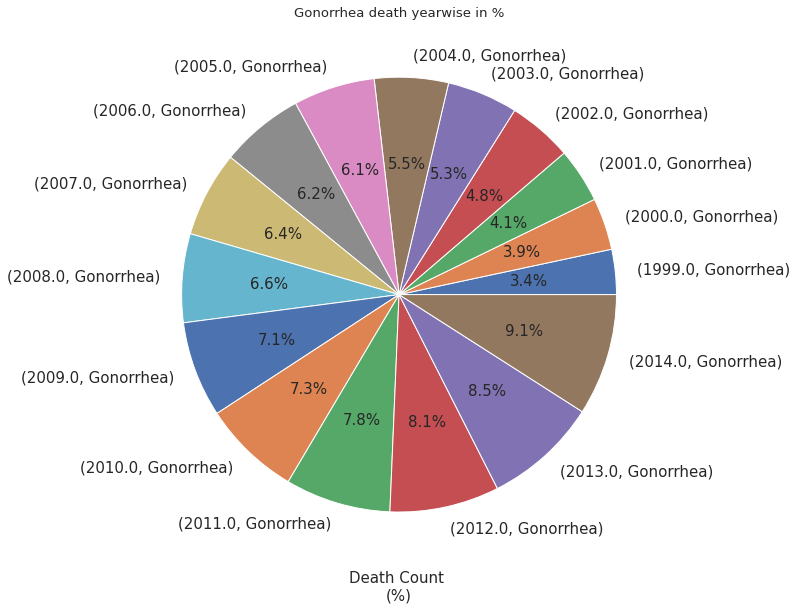

In [48]:
plt.figure(figsize=(10,10))
count2.plot.pie(shadow=False,startangle=0,autopct='%1.1f%%',fontsize=15)
plt.xlabel("Death Count \n(%)",fontsize=15)
plt.title("Gonorrhea death yearwise in %")
plt.ylabel("")

2010 accounting to 7.3% of death cases stands at 5th position whereas 2014 has the highest count.

In [44]:
#std cases
count3=data4.groupby(['Year','Disease']).sum().STD_Cases

Text(0, 0.5, '')

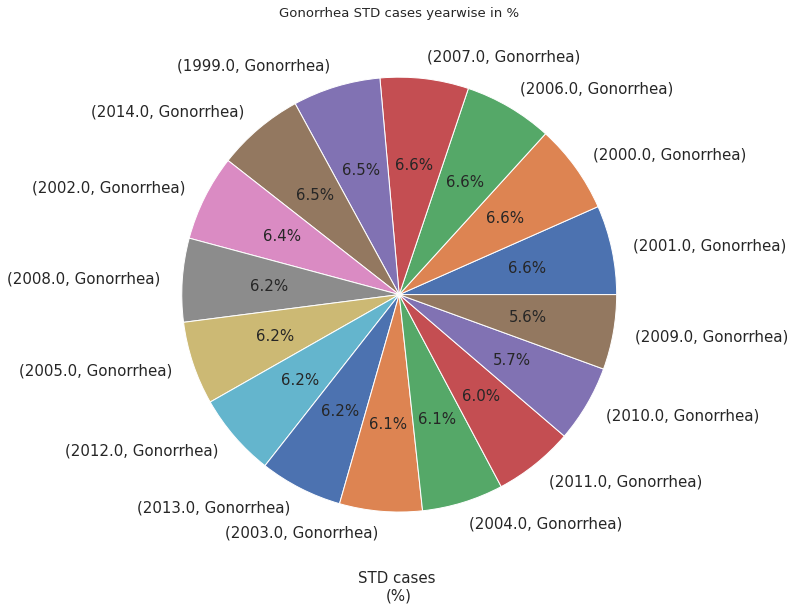

In [49]:
c=count3.sort_values(ascending = False) 
# figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.figure(figsize=(10,10))
c.plot.pie(shadow=False,startangle=0,autopct='%1.1f%%',fontsize=15)
plt.xlabel("STD cases \n(%)",fontsize=15)
plt.title("Gonorrhea STD cases yearwise in %")
plt.ylabel("")


2010 accounting to 5.7% of STD cases stands at 15th position whereas 2001 has the highest cases

No people with Gonorrhea cases do not have the highest cases and mortality rate due to drug overdose in 2010 but they have the highest STD cases and drugs death in 2001.

## Conclusion:
<br>
- The number of STD's do not have significant difference based of the gender.
<br>
- Based on the above analysis of the datasets, I have concluded that the California has been the most populated state even in the early 90's. This lead to a greater opportunity for the STD and diseases to speard over the population in california as we have observed that the state with higher population has high number of STD's.
<br>
- Populationg over the years have not increased significantly but the number of STD's have increased especially in Newyork, Population of Newyork grew alot in years 2000-2002 hence leading to growth in STD's.
<br>
- Yearly Deaths in the cities Due to STD's went on increasing over the years even though there was no spike in the population.
<br>
- The hypothesis was proved right that people of california have the highest number of daeths recorded.
<br>
-2014 recorded highest number of deaths due to Gonorrhea. And 2001 recorded highest number of Gonorrhea cases.
<br>
- I learned how to spot the connection between two datasets. In addition, I learnt how to analyze and visualize data using a variety of approaches and techniques. I learned how to combine datasets using characteristics and column names. In addition, I learned how to animate the visualization in order to make it more interesting and understandable.
